# Банки - Анализ оттока клиентов

**Задача:** 

 Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

- Проведите исследовательский анализ данных,
- Выделите портреты клиентов, которые склонны уходить из банка,
- Сформулируйте и проверьте статистические гипотезы.

**Описание данных**
Файл bank_scrooge.csv:

- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — приблизительная оценка собственности клиента,
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — был ли клиент активен последнее время,
- salary — заработная плата клиента
- churn — уходит или нет.


**Инструкция по выполнению проекта**

**1. Загрузите данные и изучите общую информацию**

- Загрузите данные и изучите общую информацию о датасете. 
- Что можно сказать о каждом столбце? Значения какого типа они хранят?
- Есть ли аномалии в данных?

**2. Выполните предобработку данных**
 
- Изучите, есть ли дубликаты в данных. 
- Поищите пропуски: встречаются ли они, в каких столбцах? Можно ли их обработать или оставить как есть?
- Добавте необходимые столбцы. 
- Обработка аномальных значений, если будут выявлены.
- Обработка названий столбцов и текста в данных, при необходимости.

**3. Анализ данных**

- Исследуйте клиентов банка по категориям: возраст, пол, город и т.д..
- Составьте и визуализируйте таблицу кореляции по разным признакам из датасета.
- Составьте портреты пользователей? 
- Визуалирируйте данные, где это необходимо.
- Рассмотрите и изобразите данные в разрезе ушедших и не ушедших клиентов
- Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.
- Соберите наблюдения по вопросам выше в один общий вывод.

**4. Проверка гипотез**
- Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались
- Проверьте гипотезу о влиянии искользования кредитной карты на отточность клиентов
- Проверьте гипотезу различия активности между теми клиентами, которые ушли и теми, которые остались за последний месяц их жизни в системе банка.



**5. Подготовка дашборда**

Чтобы отправить дашборд, приложите к проекту ссылку на файл.

1. Постройте диаграмму, отображающую распределение заработной платы клиентов.
2. Добавьте индикатор, отображающий процент клиентов, имеющих кредитную карту.
3. Добавьте фильтр дашборда, позволяющий выбрать ушёл клиент или нет.
**6. Подготовка презентации**


По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно **обязательно** в формате **pdf,** прикрепив ссылку на файл в основном проекте.


## Загрузим данные и изучим общую информацию.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

In [3]:
display(df.head())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


При первичном осмотре данных:

- данные хранятся в правильных типах данных.
- в названиях колонок видны нарушения стиля (прописные буквы, слитное написание слов)
- есть пропуски в столбце balance

## Предобработка данных.

### Заменим названия столбцов

In [5]:
df.columns.to_list()

['USERID',
 'score',
 'city',
 'gender',
 'age',
 'equity',
 'balance',
 'products',
 'credit_card',
 'last_activity',
 'EST_SALARY',
 'churn']

In [6]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]
df = df.rename(columns={'userid': 'user_id'})

In [7]:
df.columns.to_list()

['user_id',
 'score',
 'city',
 'gender',
 'age',
 'equity',
 'balance',
 'products',
 'credit_card',
 'last_activity',
 'est_salary',
 'churn']

### Обработаем пропуски в данных

In [8]:
df.isnull().sum().sort_values() / df.shape[0]*100 # Кол-вл пропусках в процентах

user_id           0.00
score             0.00
city              0.00
gender            0.00
age               0.00
equity            0.00
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
balance          22.95
dtype: float64

- Явные пропуски данных наблюдаются только в столбце balance и составляют почти 23 процента от общего количества данных в этом столбце. Посмотрим на природу возникновения данных пропустов в последующем анализе.

In [9]:
df['balance'].min()

0.0

- В даных уже есть 0, то есть заменять пропуски 0 будет не корректно. Так как это может значительно исказить общую картину.
- Нужно уточнить у специалистов, которые собирали данные, чем можно объяснить пропуски данных в этом столбце.

### Обработаем дубликаты

In [10]:
print('Всего строк -', len(df))
print('Повторяющихся строк -', len(df)- len(df.drop_duplicates()))

Всего строк - 10000
Повторяющихся строк - 1


In [11]:
df = df.drop_duplicates()

In [12]:
duplicateRows = df[df.duplicated(['user_id'])]
display(duplicateRows) 

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.0,Ярославль,М,49,0,NaN,1,1,1,177700.78,0
1837,210662,896.0,Ростов,Ж,37,0,NaN,2,0,0,90916.04,0
2138,131419,739.0,Ярославль,Ж,37,3,1307941.65,3,0,0,103867.47,0
2165,187635,692.0,Ярославль,Ж,44,0,NaN,1,1,1,160368.82,0
2302,220816,934.0,Ярославль,Ж,74,5,1294285.39,3,1,0,95606.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
9785,168998,895.0,Ярославль,М,44,0,282653.53,3,0,0,255296.47,0
9819,140934,832.0,Рыбинск,М,45,3,385763.16,2,0,1,59651.35,1
9880,217412,886.0,Ярославль,Ж,35,3,1026172.14,2,1,0,53099.16,0


- В данных присутствуют 72 повторяющихся ID клиентов. Такого не должно случаться, так как ID - это уникальный ключ пользователя.

In [13]:
df = df.drop_duplicates(subset=['user_id']) # Удаляю все повторяющиеся ID

In [14]:
df_salary = df.drop('est_salary', axis=1)
print('Всего строк -', len(df_salary))
print('Повторяющихся строк -', len(df_salary)- len(df_salary.drop_duplicates()))

Всего строк - 9927
Повторяющихся строк - 0


### Обработаем выбросы в данных

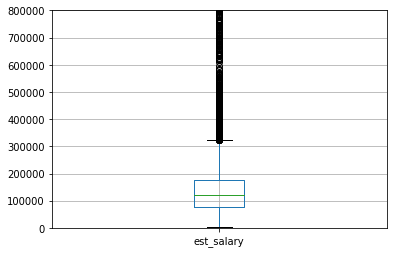

In [15]:
df.boxplot('est_salary') # строю диаграмму размаха
plt.ylim(0, 800000);

Выбросы = наблюдения > Q3 + 1,5*IQR или Q1 – 1,5*IQR

In [16]:
q1 = df['est_salary'].quantile(0.25)                 
q3 = df['est_salary'].quantile(0.75)
iqr = q3 - q1
qq1 = q1 - 1.5*iqr
qq3 = q3 + 1.5*iqr

df_1 = df.query('est_salary >= 10000 and est_salary <= @qq3').reset_index(drop=True)

In [17]:
df_1.shape[0] / df.shape[0]

0.949934522010678

- Привела данные к корректному, для дальнейшего анализа, виду. 
- Убрала дубликаты и выбросы из датасета.
- При обработке мы потеряли меньше 5% данных и можем продолжить анализ.

## Исследовательсий анализ данных

### Рассмотрим уникальность данных в некоторых столбцах

In [18]:
df_1['age'].sort_values().unique() # Вывожу уникальные значения солбца age

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86])

- Никакие возростные аномалии замечены не были) 
- Самому молодому клиенту нашего банка - 18 лет, а самому пожилому - 86.

In [19]:
df_1['city'].sort_values().unique() # Вывожу уникальные значения солбца city

array(['Ростов', 'Рыбинск', 'Ярославль'], dtype=object)

- С городами тоже все в порядке. Три города, как и заявленно в описании.

In [20]:
df_1['gender'].sort_values().unique() # Вывожу уникальные значения солбца gender

array(['Ж', 'М'], dtype=object)

- В датасете представлены два гендера - М и Ж.

### Создания описательной статистики

In [21]:
df_1.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9430.000000,9430.000000,9430.000000,9430.000000,7.466000e+03,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000
mean,171761.946129,847.129586,42.851644,2.686320,7.416156e+05,1.888229,0.676988,0.521103,123660.663191,0.184730
std,33716.629536,63.562512,12.151968,1.956905,1.790202e+06,0.795055,0.467652,0.499581,64972.788166,0.388099
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,10010.350000,0.000000
25%,142579.750000,802.000000,34.000000,1.000000,2.926960e+05,1.000000,0.000000,0.000000,73481.890000,0.000000
50%,172773.000000,851.000000,40.000000,3.000000,5.136392e+05,2.000000,1.000000,1.000000,115611.370000,0.000000
75%,201184.250000,897.000000,51.000000,4.000000,9.434506e+05,2.000000,1.000000,1.000000,165151.142500,0.000000
max,229145.000000,999.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,323502.280000,1.000000


- Минимальное значение столбца score - 642, а максимальное - 1000, медиана - 853.
- Медианный возраст наших клиентов 40 лет.
- В столбце с данными о балансе клиентов видим большую разницу между медианой и средним значением, что может говорить о выбросах в данных.
- Медиана зарплаты - почти 120 т.р. , а среднее значение этого столбца - 147 т.р. Рассмотрим выбросы в этих данных в последующем анализе.

In [22]:
def plt(i,l): #Создаем функцию для автоматизирования постоения боксплотов.
    plot = df_1.boxplot(i, by='churn',figsize=(10,10)).set_ylim(0,l);
    return plot 

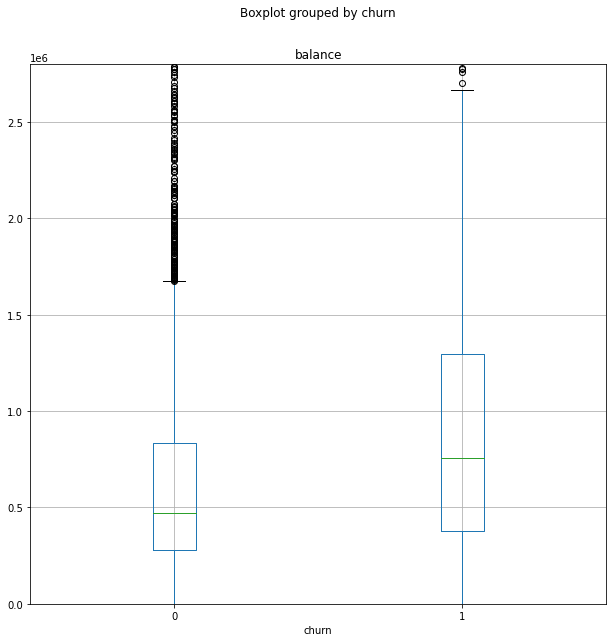

In [23]:
plt('balance', 2800000);

- Баланс у отточных клиентов значительно выше. 
- Медианное значение у не оточных клиентов почти 500 т.р., в то время как у отточных данный показатель составляет 750 т.р.

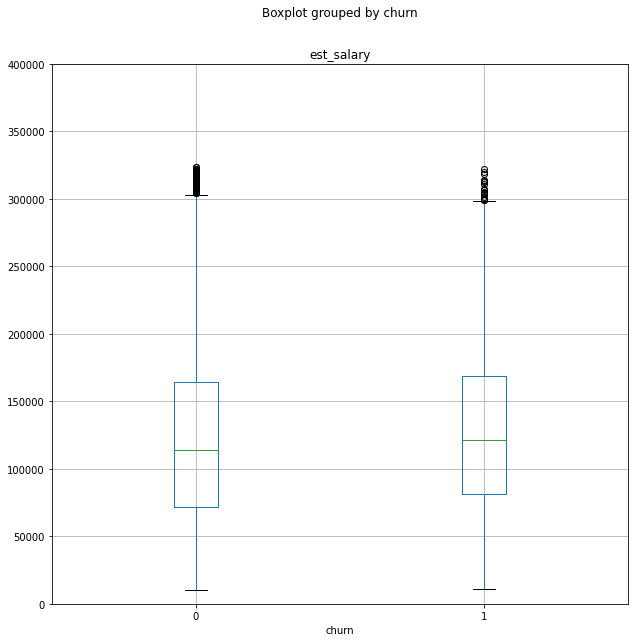

In [24]:
plt('est_salary', 400000);

- Заработная плата у отточных клиентов незначительно выше, чем у оставшихся в нашем банке.

### Изучим корреляцию между признаками

In [25]:
df_1['gender_1'] = df_1['gender'] #Cоздаю копии столбцов, которые буду кодировать в дальнейшем
df_1['city_1'] = df_1['city']

In [26]:
df_corr = pd.get_dummies(df_1, columns=['gender_1','city_1'])
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_1_Ж,gender_1_М,city_1_Ростов,city_1_Рыбинск,city_1_Ярославль
user_id,1.000000,0.005881,0.023299,0.003321,-0.007977,-0.010717,0.006925,-0.032671,0.005939,-0.015067,-0.029863,0.029863,-0.033454,0.011740,0.013532
score,0.005881,1.000000,-0.010029,0.058443,0.168402,-0.011487,-0.087899,-0.032236,0.184946,0.102581,-0.002586,0.002586,-0.032791,0.006526,0.017744
age,0.023299,-0.010029,1.000000,0.034118,0.090696,0.034234,-0.134255,-0.008595,-0.074357,-0.055018,0.223665,-0.223665,0.046383,0.031181,-0.061441
equity,0.003321,0.058443,0.034118,1.000000,0.155428,0.413043,-0.157316,-0.003860,-0.171386,0.256866,0.020260,-0.020260,0.027412,-0.003484,-0.016606
balance,-0.007977,0.168402,0.090696,0.155428,1.000000,0.073214,-0.052741,0.016990,0.135504,0.076480,-0.036603,0.036603,-0.025407,-0.020723,0.037296
products,-0.010717,-0.011487,0.034234,0.413043,0.073214,1.000000,-0.255707,0.040651,-0.124035,0.289648,0.023009,-0.023009,-0.014307,-0.043183,0.049138
credit_card,0.006925,-0.087899,-0.134255,-0.157316,-0.052741,-0.255707,1.000000,-0.035735,0.015845,-0.128739,-0.128232,0.128232,-0.097981,-0.051063,0.116477
last_activity,-0.032671,-0.032236,-0.008595,-0.003860,0.016990,0.040651,-0.035735,1.000000,-0.024497,0.167512,0.015369,-0.015369,0.009005,0.050021,-0.051470
est_salary,0.005939,0.184946,-0.074357,-0.171386,0.135504,-0.124035,0.015845,-0.024497,1.000000,0.036660,-0.112620,0.112620,-0.101801,-0.043985,0.112863
churn,-0.015067,0.102581,-0.055018,0.256866,0.076480,0.289648,-0.128739,0.167512,0.036660,1.000000,-0.141562,0.141562,0.003311,-0.030489,0.025036


- Исходя из полученной корреляционной матрицы можем сделать вывод о том, что связь между всеми признаками не очень велика. 
- Наибольшая корреляцию с отточностью из банка имеют - products(0.29), equity (0.26), last_activity(0.16) и gender_1_М (0.14). 
- Чем больше, тем больше вероятность, что он перестанет быть клиентом банка. Но и эта связь находится между уровнями "очень слабая" и "слабая".

### Составим портрет отточного клиента

In [27]:
df_churn_1 = df_1.query('churn == 1') #создаю срез данных по отточным клиентам
df_churn_0 = df_1.query('churn == 0') #срез по не отточным клиентам

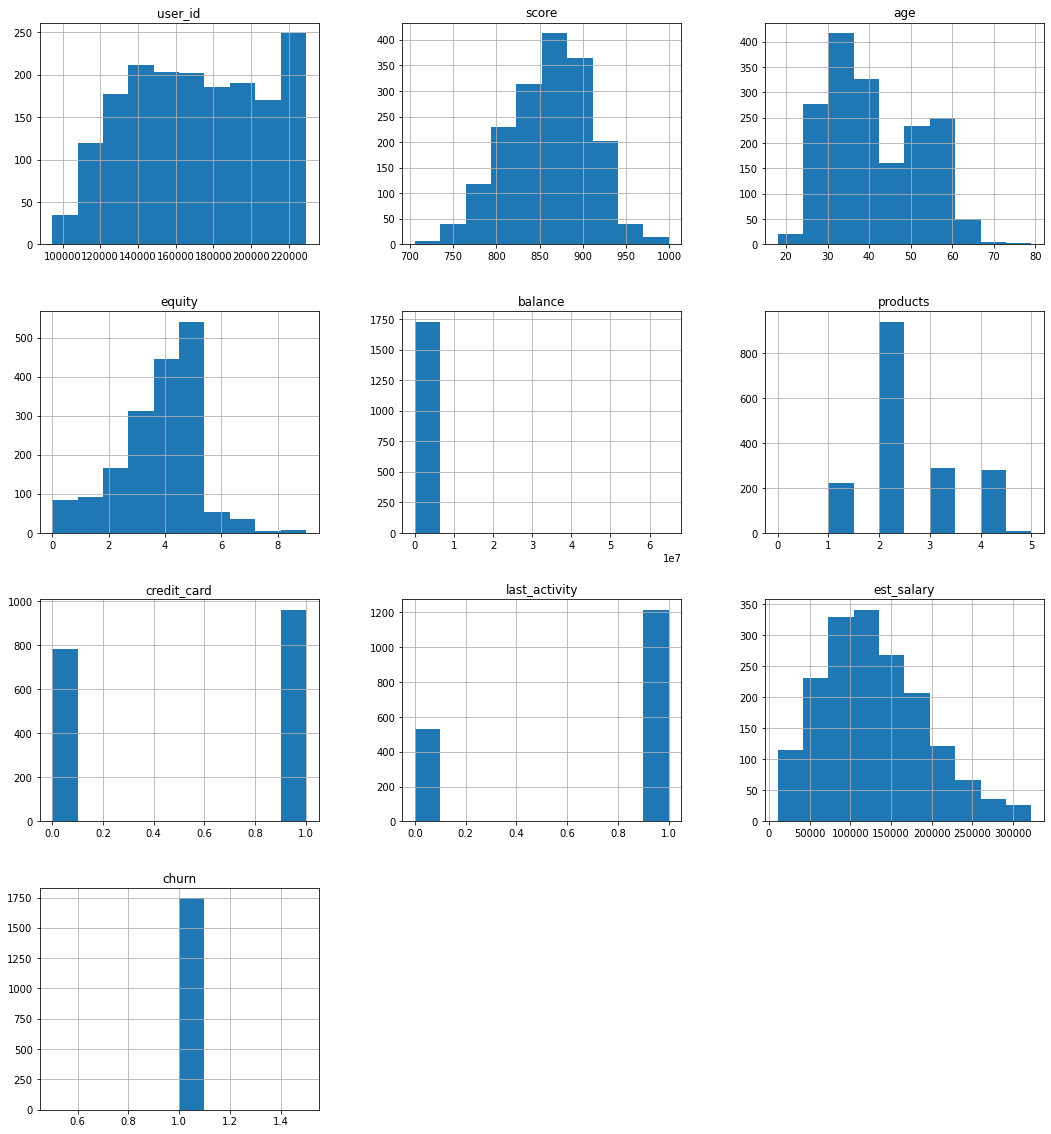

In [28]:
df_churn_1.hist(figsize=(18, 20));

- Из полученных данных можем составить портрет отточного клиента.
- Это клиент от 30 до 35 лет с оценкой скоринга в 860 пунктов, приблизительной оценкой собственности - 5, пользуется двумя продуктами банка. Зарплата у этого клиента примерно 130 тыс. руб. и это активный пользователь (как минимум был активен за последний месяц пред цходом).

### Добавим категориальные значения столбцу age

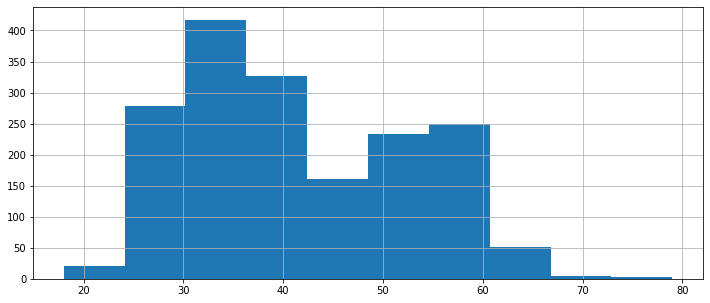

In [29]:
df_churn_1['age'].hist(figsize=(12, 5));

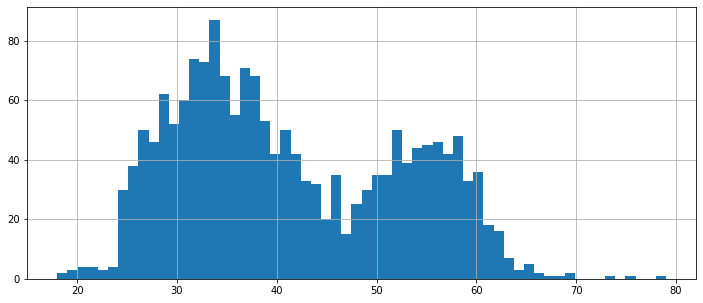

In [30]:
df_churn_1['age'].hist(figsize=(12, 5), bins = 60); # Добавляю больше корзин для более детального рассмотрения данных

- Из гистограммы отчетливо видно, что до 25 лет, отток клиентов невелик.
- Второй сегмент от 25 и до 30. Здесь отток составляет почти 300 человек. 
- Рекордный отток наблюдается в возрастной группе от 30 до 50 лет. 
- Следующей группой я выделяю возрастную категорию от 50 до 64 лет.
- И наконец, самая низкая по показателю отточности позросная группа - 65+

In [31]:
def categorize_age(age): #создаем функцию, которая присваевает клиенту категорию в зависимости от его возраста
    try:
        if 18 <= age <= 24:
            return 'Молодежь'
        elif 25 <= age <= 30:
            return 'Взрослый человек'
        elif 31 <= age <= 49:
            return 'Лицо «зрелого возраста»'
        elif 50 <= age <= 64:
            return 'Предпенсионный возраст'
        elif age >= 65:
            return 'Пенсионер'
    except:
        pass

In [32]:
df_1['age_category'] = df_1['age'].apply(categorize_age) #применяем функцию к стролбцу age и записываем данные в новый столбец

### Сравним отточную и оставшуюся группы клиентов в разрезе разных параметров

In [33]:
def pivot_df(df1, ind, col, val): #создаем функцию, которая строит сводную таблицу по выбраному признаку в разбивке отточных и не отточных коиентов
    try:
        data1 = df1.pivot_table(index=ind, columns=col, values=val, aggfunc='count').reset_index()
        data1['ratio'] = round((data1[1]/(data1[0]+data1[1])*100),2)
        print(data1)
        ax = sns.countplot(x =ind , hue = 'churn', data = df1)
        plt.title('Распределение отточных и оставшихся клиентов по признаку ' + ind)
        plt.xlabel('Значение')
        plt.show()
    except:
        pass

churn       city     0     1  ratio
0         Ростов  1133   262  18.78
1        Рыбинск  2117   419  16.52
2      Ярославль  4438  1061  19.29


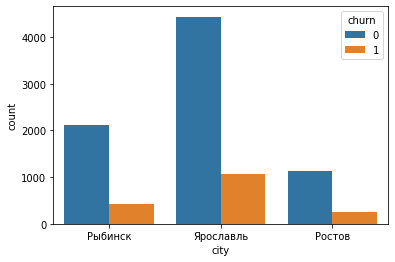

In [34]:
pivot_df(df_1, 'city', 'churn', 'age')

- Самый ощутимый отток клиентов у нас в Ярославле.

churn gender     0     1  ratio
0          Ж  4134   619  13.02
1          М  3554  1123  24.01


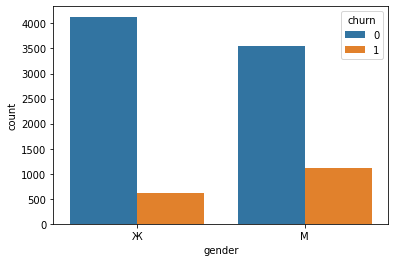

In [35]:
pivot_df(df_1, 'gender', 'churn', 'age')

- В разбивке по гендеру больший отток наблюдается у мужчин.

churn             age_category     0    1  ratio
0             Взрослый человек   858  278  24.47
1      Лицо «зрелого возраста»  4524  933  17.10
2                     Молодежь   141   20  12.42
3                    Пенсионер   531   14   2.57
4       Предпенсионный возраст  1634  497  23.32


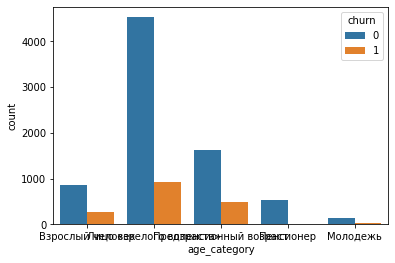

In [36]:
pivot_df(df_1, 'age_category', 'churn', 'age')

- Самый большой ооток в сегменте "Лицо зрелого возраста" - в колличественном измерении
- А вот в процентном соотношении лидирует по оотоку сегмент "Взрослый человек"

churn  credit_card     0    1  ratio
0                0  2263  783  25.71
1                1  5425  959  15.02


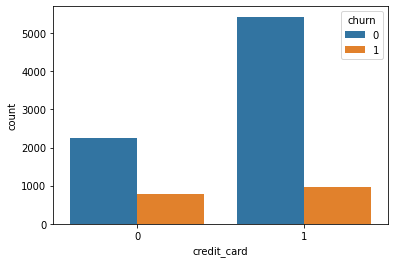

In [37]:
pivot_df(df_1, 'credit_card', 'churn', 'age')

- Количество ооточных клиентов с кредитной картой и без нее разнится незначительно в количественном соотношении.
- А в процентном соотношении разница есть.

churn  products       0      1  ratio
0             0     NaN    1.0    NaN
1             1  2804.0  224.0   7.40
2             2  3989.0  941.0  19.09
3             3   709.0  287.0  28.82
4             4   165.0  280.0  62.92
5             5    21.0    9.0  30.00


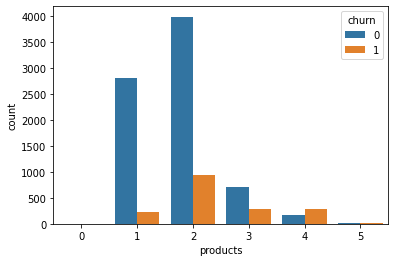

In [38]:
pivot_df(df_1, 'products', 'churn', 'age')

- Самый ввсокий ооток клиентов наблюдается среди пользователей двумя банковскими продуктами, но это так же самый большой по кол-ву клиентов сегмент.
- В процентном соотношении самый большой отток у клиентой с 4 банковскими продуктами - 60%.

churn  last_activity     0     1  ratio
0                  0  3988   528  11.69
1                  1  3700  1214  24.70


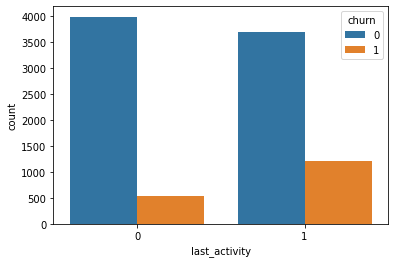

In [39]:
pivot_df(df_1, 'last_activity', 'churn', 'age')

- И в процентном и в количественном соотношении по оттоку лидируют активные пользователи.

churn  equity     0    1  ratio
0           0  2180   85   3.75
1           1   662   93  12.32
2           2   865  165  16.02
3           3  1190  311  20.72
4           4  1344  446  24.92
5           5  1288  541  29.58
6           6   101   53  34.42
7           7    41   35  46.05
8           8    11    6  35.29
9           9     6    7  53.85


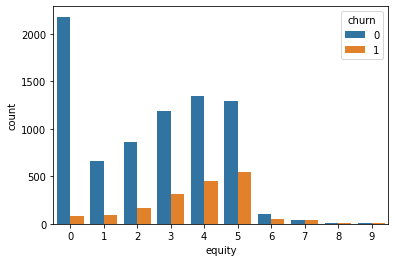

In [40]:
pivot_df(df_1, 'equity', 'churn', 'age')

- Чаше других, на данный момент, уходят клиенту с приблизительной оценкой собственности - 5.

- Основываясь на полученных данных, могу сформулировать примерные сегменты пользователей для более детально проверки отточности.
- Так же вижу нецелесообразным проверять гипотезу овлиянии кредитной карты на отточность клиентов. Вместо нее предлагаю проанализировать разницу в возрасте ооточных и оставшихся в банке клиентов.

### Выделим сегменты пользователей и найдем самые отточные

In [41]:
data = df_1.query('city=="Ярославль" and equity==5 and last_activity==1').groupby('churn').count()
data = data.T
data['ratio'] = round((data[1]/(data[0]+data[1])*100),2)
print(data)

churn            0    1  ratio
user_id        278  249  47.25
score          278  249  47.25
city           278  249  47.25
gender         278  249  47.25
age            278  249  47.25
equity         278  249  47.25
balance        278  249  47.25
products       278  249  47.25
credit_card    278  249  47.25
last_activity  278  249  47.25
est_salary     278  249  47.25
gender_1       278  249  47.25
city_1         278  249  47.25
age_category   278  249  47.25


In [42]:
data = df_1.query('city=="Ярославль" and equity==5 and gender=="М"').groupby('churn').count()
data = data.T
data['ratio'] = round((data[1]/(data[0]+data[1])*100),2)
print(data)

churn            0    1  ratio
user_id        315  228  41.99
score          315  228  41.99
city           315  228  41.99
gender         315  228  41.99
age            315  228  41.99
equity         315  228  41.99
balance        315  228  41.99
products       315  228  41.99
credit_card    315  228  41.99
last_activity  315  228  41.99
est_salary     315  228  41.99
gender_1       315  228  41.99
city_1         315  228  41.99
age_category   315  228  41.99


In [43]:
data = df_1.query('last_activity==1 and equity==5 and gender=="М"').groupby('churn').count()
data = data.T
data['ratio'] = round((data[1]/(data[0]+data[1])*100),2)
print(data)

churn            0    1  ratio
user_id        224  248  52.54
score          224  248  52.54
city           224  248  52.54
gender         224  248  52.54
age            224  248  52.54
equity         224  248  52.54
balance        224  248  52.54
products       224  248  52.54
credit_card    224  248  52.54
last_activity  224  248  52.54
est_salary     224  248  52.54
gender_1       224  248  52.54
city_1         224  248  52.54
age_category   224  248  52.54


In [44]:
data = df_1.query('city=="Ярославль" and gender=="М" and products==2').groupby('churn').count()
data = data.T
data['ratio'] = round((data[1]/(data[0]+data[1])*100),2)
print(data)

churn            0    1  ratio
user_id        969  329  25.35
score          969  329  25.35
city           969  329  25.35
gender         969  329  25.35
age            969  329  25.35
equity         969  329  25.35
balance        881  329  27.19
products       969  329  25.35
credit_card    969  329  25.35
last_activity  969  329  25.35
est_salary     969  329  25.35
gender_1       969  329  25.35
city_1         969  329  25.35
age_category   969  329  25.35


In [45]:
data = df_1.query('last_activity==1 and equity==5 and gender=="Ж"').groupby('churn').count()
data = data.T
data['ratio'] = round((data[1]/(data[0]+data[1])*100),2)
print(data)

churn            0    1  ratio
user_id        335  151  31.07
score          335  151  31.07
city           335  151  31.07
gender         335  151  31.07
age            335  151  31.07
equity         335  151  31.07
balance        335  151  31.07
products       335  151  31.07
credit_card    335  151  31.07
last_activity  335  151  31.07
est_salary     335  151  31.07
gender_1       335  151  31.07
city_1         335  151  31.07
age_category   335  151  31.07


In [46]:
data = df_1.query('last_activity==1 and age_category=="Взрослый человек" and gender=="М"').groupby('churn').count()
data = data.T
data['ratio'] = round((data[1]/(data[0]+data[1])*100),2)
print(data)

churn            0    1  ratio
user_id        246  146  37.24
score          246  146  37.24
city           246  146  37.24
gender         246  146  37.24
age            246  146  37.24
equity         246  146  37.24
balance        159  146  47.87
products       246  146  37.24
credit_card    246  146  37.24
last_activity  246  146  37.24
est_salary     246  146  37.24
gender_1       246  146  37.24
city_1         246  146  37.24
age_category   246  146  37.24


In [47]:
data = df_1.query('last_activity==1 and age_category=="Взрослый человек" and gender=="М"').groupby('churn').count()
data = data.T
data['ratio'] = round((data[1]/(data[0]+data[1])*100),2)
print(data)

churn            0    1  ratio
user_id        246  146  37.24
score          246  146  37.24
city           246  146  37.24
gender         246  146  37.24
age            246  146  37.24
equity         246  146  37.24
balance        159  146  47.87
products       246  146  37.24
credit_card    246  146  37.24
last_activity  246  146  37.24
est_salary     246  146  37.24
gender_1       246  146  37.24
city_1         246  146  37.24
age_category   246  146  37.24


In [48]:
data = df_1.query('city=="Рыбинск" and gender=="М" and products==2').groupby('churn').count()
data = data.T
data['ratio'] = round((data[1]/(data[0]+data[1])*100),2)
print(data)

churn            0    1  ratio
user_id        516  176  25.43
score          516  176  25.43
city           516  176  25.43
gender         516  176  25.43
age            516  176  25.43
equity         516  176  25.43
balance        466  175  27.30
products       516  176  25.43
credit_card    516  176  25.43
last_activity  516  176  25.43
est_salary     516  176  25.43
gender_1       516  176  25.43
city_1         516  176  25.43
age_category   516  176  25.43


In [49]:
data = df_1.query('city=="Рыбинск" and gender=="Ж" and products==2').groupby('churn').count()
data = data.T
data['ratio'] = round((data[1]/(data[0]+data[1])*100),2)
print(data)

churn            0   1  ratio
user_id        719  96  11.78
score          719  96  11.78
city           719  96  11.78
gender         719  96  11.78
age            719  96  11.78
equity         719  96  11.78
balance        685  96  12.29
products       719  96  11.78
credit_card    719  96  11.78
last_activity  719  96  11.78
est_salary     719  96  11.78
gender_1       719  96  11.78
city_1         719  96  11.78
age_category   719  96  11.78


In [50]:
data = df_1.query('city=="Ярославль" and products==4 and gender=="М"').groupby('churn').count()
data = data.T
data['ratio'] = round((data[1]/(data[0]+data[1])*100),2)
print(data)

churn           0    1  ratio
user_id        53  114  68.26
score          53  114  68.26
city           53  114  68.26
gender         53  114  68.26
age            53  114  68.26
equity         53  114  68.26
balance        53  114  68.26
products       53  114  68.26
credit_card    53  114  68.26
last_activity  53  114  68.26
est_salary     53  114  68.26
gender_1       53  114  68.26
city_1         53  114  68.26
age_category   53  114  68.26


In [51]:
data = df_1.query('last_activity==1 and products==4 and gender=="М"').groupby('churn').count()
data = data.T
data['ratio'] = round((data[1]/(data[0]+data[1])*100),2)
print(data)

churn           0    1  ratio
user_id        84  124  59.62
score          84  124  59.62
city           84  124  59.62
gender         84  124  59.62
age            84  124  59.62
equity         84  124  59.62
balance        84  124  59.62
products       84  124  59.62
credit_card    84  124  59.62
last_activity  84  124  59.62
est_salary     84  124  59.62
gender_1       84  124  59.62
city_1         84  124  59.62
age_category   84  124  59.62


Изходя из предыдущего анализа могу выделить два наиболее отточных в процентном соотношении сегмента.
- 1) Мужчины из Ярославля, которые пользуются 4мя продуктами банка - 68% оттока в данном сегменте (167 человек в сегменте)
- 2) Мужчины с приблизительной оценкой имущества - 5, которые были активны в последний месяц. Процент оттока -53% и общая численность сегентв - 472.
- Приоритезировать стоит 2-ю группу, так как включает в себя большее кол-во клиентов.
- Рекомендую обратить внимание на приложение банка и понять, что могло оттолкнуть мужскую аудиторию. Возможно недавно были добавлены какие-то апдейты, которые визуально или функционально не подошли мужчинам.
- Возможно стоит обратить внимание на функционал приложения для людей с высокой оценкой имущества и которые пользуются 4мя продуктами банка. Может не совсем удобная навигация между продуктами банка вызывает негативный эмоциональный окрас у пользователей.

## Проверка статистических гипотез

1) Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались

2) Проверьте гипотезу различия активности между теми клиентами, которые ушли и теми, которые остались за последний месяц их жизни в системе банка

3) Проверьте гипотезу различии в возрасте между теми клиентами, которые ушли и теми, которые остались 

###  Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались

- t-критерий Стьюдента — общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента. Наиболее часто t-критерии применяются для проверки равенства средних значений в двух выборках.

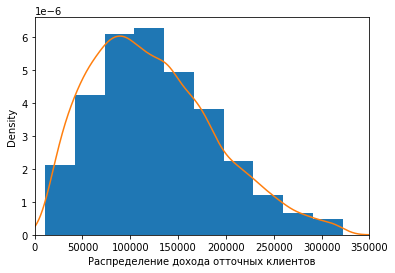

In [52]:
ax = df_churn_1['est_salary'].plot.hist(density=True, xlim=[0,350000])
df_1['est_salary'].plot.density(ax=ax)
ax.set_xlabel('Распределение дохода отточных клиентов');

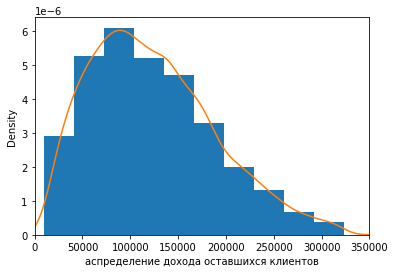

In [53]:
ax = df_churn_0['est_salary'].plot.hist(density=True, xlim=[0,350000])
df_1['est_salary'].plot.density(ax=ax)
ax.set_xlabel('аспределение дохода оставшихся клиентов');

In [54]:
print('Размер первой выборки = ', len(df_churn_1['est_salary']))
print('Размер второй выборки = ', len(df_churn_0['est_salary']))

Размер первой выборки =  1742
Размер второй выборки =  7688


- Выборочные средние должны быть нормально распределены.
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны.
- Иногда советуют предварительно проверить равенство дисперсий специальными тестами (например, тестом Левена). Мы не будем так делать: исследования показывают, что это только увеличивает вероятность сделать неверный вывод. Так что «правило большого пальца» тут простое: если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные, укажем **equal_var= False** при вызове метода scipy.stats.ttest_ind().
- Так как распределение доходов в сравниваемых выборках похоже на нормальное, применим t-критерий Стьюдента.

**Сформулируем гипотезы:**
<br> **H₀** - статистически значимых различий между доходами клиентов, которые ушли и теми, которые остались, нет.  
<br> **H₁** - статистически значимых различий между доходами клиентов, которые ушли и теми, которые остались, есть.

- Назначим уровень статистической значимости alpha - 0.05.

In [55]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df_churn_1['est_salary'], df_churn_0['est_salary'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.00026469297903353785
Отвергаем нулевую гипотезу


In [56]:
print('Средний доход у отточных клиентов = ', round((df_churn_1['est_salary'].mean()),2))
print('Средний доход у оставшихся клиентов = ', round((df_churn_0['est_salary'].mean()),2))
print('')
print('Медианный доход у отточных клиентов = ', round((df_churn_1['est_salary'].median()),2))
print('Медианный доход у оставшихся клиентов = ', round((df_churn_0['est_salary'].median()),2))

Средний доход у отточных клиентов =  128664.32
Средний доход у оставшихся клиентов =  122526.9

Медианный доход у отточных клиентов =  121405.0
Медианный доход у оставшихся клиентов =  113898.58


### Проверьте гипотезу различия активности между теми клиентами, которые ушли и теми, которые остались за последний месяц их жизни в системе банка

**Сформулируем гипотезы:**
<br> **H₀** - статистически значимых различий между активностью клиентов, которые ушли и теми, которые остались, нет.  
<br> **H₁** - статистически значимых различий между активностью клиентов, которые ушли и теми, которые остались, есть.

- Назначим уровень статистической значимости alpha - 0.05.

In [57]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df_churn_1['last_activity'], df_churn_0['last_activity'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.4958785721191827e-64
Отвергаем нулевую гипотезу


### Проверьте гипотезу различии в возрасте между теми клиентами, которые ушли и теми, которые остались

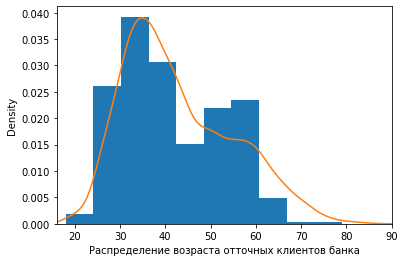

In [58]:
ax = df_churn_1['age'].plot.hist(density=True, xlim=[16,90])
df_1['age'].plot.density(ax=ax)
ax.set_xlabel('Распределение возраста отточных клиентов банка');

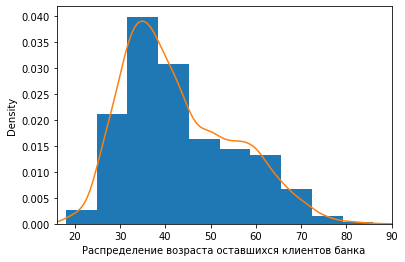

In [59]:
ax = df_churn_0['age'].plot.hist(density=True, xlim=[16,90])
df_1['age'].plot.density(ax=ax)
ax.set_xlabel('Распределение возраста оставшихся клиентов банка');

- Так как распределения нельзя назвать нормальными, принимаю решение использовать критерий Манна-Уитни.
- U-критерий Манна-Уитни — непараметрический статистический критерий, используемый для оценки различий между двумя выборками по признаку, измеренному в количественной или порядковой шкале. U-критерий является ранговым, поэтому он инвариантен по отношению к любому монотонному преобразованию шкалы измерения.

**Сформулируем гипотезы:**
<br> **H₀** - статистически значимых различий между возрастом клиентов, которые ушли и теми, которые остались, нет.  
<br> **H₁** - статистически значимых различий между возрастом клиентов, которые ушли и теми, которые остались, есть.

- Назначим уровень статистической значимости alpha - 0.05.

In [60]:
alpha = 0.05

results = st.mannwhitneyu(df_churn_1['age'], df_churn_0['age'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.5030867758737548e-06
Отвергаем нулевую гипотезу


In [61]:
print('Средний возраст отточных клиентов = ', round((df_churn_1['age'].mean()),2))
print('Средний возраст оставшихся клиентов = ', round((df_churn_0['age'].mean()),2))
print('')
print('Медианный доход у отточных клиентов = ', df_churn_1['age'].median())
print('Медианный доход у оставшихся клиентов = ', df_churn_0['age'].median())

Средний возраст отточных клиентов =  41.45
Средний возраст оставшихся клиентов =  43.17

Медианный доход у отточных клиентов =  39.0
Медианный доход у оставшихся клиентов =  40.0


### Вывод

Были проверены гипотезы:

    
1) о различии дохода между теми клиентами, которые ушли и теми, которые осталис.

2) о различии активности между теми клиентами, которые ушли и теми, которые остались за последний месяц их жизни в системе банка

3) о различии в возрасте между теми клиентами, которые ушли и теми, которые остались

Все три нулевые гипотезы были отвергнуты в ходе проверки и мы приняли альтернативные.

## Общий вывод

[Презентация](https://disk.yandex.ru/i/lEEY6-QoWc26Vg)

[Дашборд](https://public.tableau.com/app/profile/yanina.shmatko/viz/MetanPromBank_16784746596480/Dashboard1?publish=yes)

В ходе выполнения данной проектной работы, я:
1. открыла, изучила и обработала данные.
- Мединые значения пользователей по неочищенным данным по парамметрам: возраст наших клиентов составляет 40 лет, зарплата - почти 120 т.р., баллы кредитного скоринга наших клиентов - 853.
- Баланс у отточных клиентов значительно выше. Медианное значение у не оточных клиентов почти 500 т.р., в то время как у отточных данный показатель составляет 750 т.р.
- Явные пропуски данных наблюдаются только в столбце balance и составляют почти 23 процента от общего количества данных в этом столбце.
- В данных присутствуют 72 повторяющихся ID клиентов, которые мы удалили.
- При обработке мы потеряли меньше 5% данных

2. Провела исследовательский анализ данных.

- В ходе анализа я выяснила, что заработная плата у отточных клиентов незначительно выше, чем у оставшихся в нашем банке.
- Построила корреляционную матрицу из которой узнала, что связь между всеми признаками не очень велика.
- Наибольшая корреляцию с отточностью из банка имеют - products(0.29), equity (0.26), last_activity(0.16) и gender_1_М (0.14).
- Чем больше корреляция, тем больше вероятность, что клиент уйдет из банка. Но и эта связь находится между уровнями "очень слабая" и "слабая".
- Портрет отточного клиента выглядит следующим образом: клиент от 30 до 35 лет с оценкой скоринга в 860 пунктов, приблизительной оценкой собственности - 5, пользуется двумя продуктами банка. Зарплата у этого клиента примерно 130 тыс. руб. и это активный пользователь (как минимум был активен за последний месяц пред цходом).
- Самый ощутимый отток клиентов у нас в Ярославле. В разбивке по гендеру больший отток наблюдается у мужчин. Самый большой ооток по возрасту в сегменте "Лицо зрелого возраста" - в колличественном измерении. А вот в процентном соотношении лидирует по оотоку сегмент "Взрослый человек" Колисество ооточных клиентов с кредитной картой и без нее разнится незначительно.  И в процентном и в количественном соотношении по оттоку лидируют активные пользователи. Чаше других, на данный момент, уходят клиенты с приблизительной оценкой собственности - 5.


**Два наиболее отточных в процентном соотношении сегмента.**
1) Мужчины из Ярославля, которые пользуются 4мя продуктами банка - 68% оттока в данном сегменте (167 человек в сегменте)

2) Мужчины с приблизительной оценкой имущества - 5, которые были активны в последний месяц. Процент оттока -53% и общая численность сегентв - 472.

Приоритезировать стоит 2-ю группу, так как включает в себя большее кол-во клиентов.
Рекомендую обратить внимание на приложение банка и понять, что могло оттолкнуть мужскую аудиторию. Возможно недавно были добавлены какие-то апдейты, которые визуально или функционально не подошли мужчинам.
Возможно стоит обратить внимание на функционал приложения для людей с высокой оценкой имущества и которые пользуются 4мя продуктами банка. Может не совсем удобная навигация между продуктами банка вызывает негативный эмоциональный окрас у пользователей.

3. Были сформулированы и проверены гипотезы:
- о различии дохода между теми клиентами, которые ушли и теми, которые осталис.
- о различии активности между теми клиентами, которые ушли и теми, которые остались за последний месяц их жизни в системе банка
- о различии в возрасте между теми клиентами, которые ушли и теми, которые остались
- Все три нулевые гипотезы были отвергнуты в ходе проверки и мы приняли альтернативные.

4. Подготовила **дашборд** <https://public.tableau.com/app/profile/yanina.shmatko/viz/MetanPromBank_16784746596480/Dashboard1?publish=yes> и **презентацию** <https://disk.yandex.ru/i/lEEY6-QoWc26Vg>.
